**Data Collection & Generation**

In [5]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker to generate synthetic data
fake = Faker()

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Create a large dataset with 50,000 entries
n_samples = 50000

# Generate customer demographic data
customer_ids = [fake.unique.uuid4() for _ in range(n_samples)]
ages = np.random.randint(18, 65, size=n_samples)
genders = np.random.choice(['Male', 'Female'], size=n_samples)
loan_amounts = np.round(np.random.uniform(1000, 50000, n_samples), 2)
loan_types = np.random.choice(['Personal Loan', 'Home Loan', 'Car Loan', 'Education Loan'], size=n_samples)
repayment_status = np.random.choice(['Paid', 'Defaulted'], size=n_samples, p=[0.8, 0.2])

# Generate customer reviews
reviews = [
    fake.sentence(nb_words=random.randint(5, 15), variable_nb_words=True)
    for _ in range(n_samples)
]

# Combine data into a DataFrame
data = pd.DataFrame({
    'Customer_ID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Loan_Amount': loan_amounts,
    'Loan_Type': loan_types,
    'Repayment_Status': repayment_status,
    'Review': reviews
})

# Save the generated data to a CSV file
data.to_csv('customer_reviews_data.csv', index=False)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   Loan_Amount       50000 non-null  float64
 4   Loan_Type         50000 non-null  object 
 5   Repayment_Status  50000 non-null  object 
 6   Review            50000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


In [10]:
data.head()

,Customer_ID,Age,Gender,Loan_Amount,Loan_Type,Repayment_Status,Review
0,ef754739-86e9-4ea3-ba6e-a41577338e0c,56,Male,30211.94,Education Loan,Defaulted,As where everyone tell character main economy ...
1,125a8ddb-a177-415f-b500-7278cc81a71f,46,Female,12385.00,Personal Loan,Paid,Some appear look.
2,4470466b-8aad-4451-a6b6-c39472825c6a,32,Male,28530.33,Home Loan,Paid,Its affect campaign.
3,34a8254a-a0a6-4060-b9be-ebaad24e31f2,60,Male,34089.66,Personal Loan,Paid,Window hand gun cell live ball commercial atto...
4,81a4dacb-aa27-4a5c-8a70-b3f25b748788,25,Male,34345.85,Personal Loan,Defaulted,Activity her which begin often because listen ...


In [11]:
data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Loan_Amount', 'Loan_Type',
       'Repayment_Status', 'Review'],
      dtype='object')

In [13]:
data.iloc

In [14]:
data.describe()

,Age,Loan_Amount
count,50000.000000,50000.000000
mean,40.979240,25477.350076
std,13.528733,14124.081573
min,18.000000,1001.440000
25%,29.000000,13174.762500
50%,41.000000,25573.930000
75%,53.000000,37746.975000
max,64.000000,49999.610000


In [15]:
len(data)

50000

In [16]:
data.dtypes

,0
Customer_ID,object
Age,int64
Gender,object
Loan_Amount,float64
Loan_Type,object
Repayment_Status,object
Review,object


In [17]:
data.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Loan_Amount,0
Loan_Type,0
Repayment_Status,0
Review,0


**Data Preprocessing**

Now, let's preprocess the text reviews and clean them.

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_review(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stop words
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply text cleaning to the 'Review' column
data['Cleaned_Review'] = data['Review'].apply(clean_review)

# Save the cleaned data
data.to_csv('cleaned_customer_reviews_data.csv', index=False)
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Customer_ID,Age,Gender,Loan_Amount,Loan_Type,Repayment_Status,Review,Cleaned_Review,Sentiment_Score,Sentiment_Label
0,ef754739-86e9-4ea3-ba6e-a41577338e0c,56,Male,30211.94,Education Loan,Defaulted,As where everyone tell character main economy ...,everyone tell character main economy truth reduce,0.166667,Positive
1,125a8ddb-a177-415f-b500-7278cc81a71f,46,Female,12385.00,Personal Loan,Paid,Some appear look.,appear look,0.000000,Positive
2,4470466b-8aad-4451-a6b6-c39472825c6a,32,Male,28530.33,Home Loan,Paid,Its affect campaign.,affect campaign,0.000000,Positive
3,34a8254a-a0a6-4060-b9be-ebaad24e31f2,60,Male,34089.66,Personal Loan,Paid,Window hand gun cell live ball commercial atto...,window hand gun cell live ball commercial atto...,0.068182,Positive
4,81a4dacb-aa27-4a5c-8a70-b3f25b748788,25,Male,34345.85,Personal Loan,Defaulted,Activity her which begin often because listen ...,activity begin often listen shake politics wes...,0.000000,Positive
...,...,...,...,...,...,...,...,...,...,...
49995,9abd7525-a9c2-40df-8830-da9bdd3aed90,60,Female,36139.75,Car Loan,Paid,Store program senior position film tough machi...,store program senior position film tough machi...,-0.296296,Negative
49996,56a7b739-7bcf-4eb7-8c40-a3050e1a3e30,46,Male,46366.13,Car Loan,Paid,Full eight use usually alone guy include.,full eight use usually alone guy include,0.050000,Positive
49997,5903835e-a273-4bd0-9834-88af4618b7d3,19,Female,17741.35,Home Loan,Paid,Cell collection hundred organization security ...,cell collection hundred organization security ...,-0.023810,Negative
49998,fd892648-f6ad-4aca-9352-23b35781c0a0,43,Female,21708.31,Personal Loan,Paid,Information trouble me sign north like commerc...,information trouble sign north like commercial...,-0.100000,Negative


**Exploratory Data Analysis (EDA)**

We will explore the dataset using SQL queries in Python.

In [19]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
data.to_sql('customer_data', conn, index=False, if_exists='replace')

# SQL query example: Get count of defaulters by loan type
query = '''
    SELECT Loan_Type, COUNT(*) AS Default_Count
    FROM customer_data
    WHERE Repayment_Status = 'Defaulted'
    GROUP BY Loan_Type
    ORDER BY Default_Count DESC;
'''

# Execute query
default_counts = pd.read_sql(query, conn)
print(default_counts)


        Loan_Type  Default_Count
0  Education Loan           2570
1   Personal Loan           2508
2       Home Loan           2492
3        Car Loan           2492


**Sentiment Analysis & Model Building**

We will use pre-trained sentiment analysis models to assign sentiment scores to customer reviews.

In [20]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
data['Sentiment_Score'] = data['Cleaned_Review'].apply(get_sentiment)

# Label reviews based on sentiment score
data['Sentiment_Label'] = np.where(data['Sentiment_Score'] >= 0, 'Positive', 'Negative')

# Save the updated data
data.to_csv('customer_reviews_with_sentiment.csv', index=False)


**Model Training & Evaluation**

We will train a simple classification model to predict the default status based on sentiment and demographic features.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Feature selection
X = data[['Age', 'Loan_Amount', 'Sentiment_Score']]
y = (data['Repayment_Status'] == 'Defaulted').astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     11950
           1       0.00      0.00      0.00      3050

    accuracy                           0.80     15000
   macro avg       0.40      0.50      0.44     15000
weighted avg       0.63      0.80      0.71     15000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Default Rate by Loan Type:**

We’ll plot a bar chart showing the default rate for each loan type.

<ipython-input-25-a67ff9008291>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Type', y='Repayment_Status', data=default_rate_by_loan, palette='viridis')


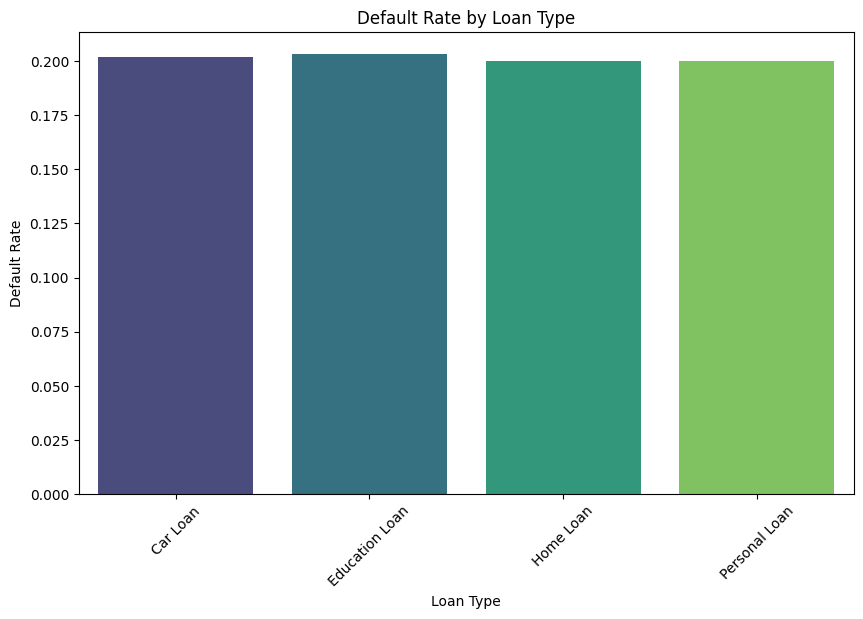

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate default rates by loan type
default_rate_by_loan = data.groupby('Loan_Type')['Repayment_Status'].apply(lambda x: (x == 'Defaulted').mean()).reset_index()

# Plot default rates by loan type
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Type', y='Repayment_Status', data=default_rate_by_loan, palette='viridis')
plt.title('Default Rate by Loan Type')
plt.ylabel('Default Rate')
plt.xlabel('Loan Type')
plt.xticks(rotation=45)
plt.show()


**Sentiment Distribution:**

We’ll plot the distribution of sentiment scores to understand the general customer sentiment.

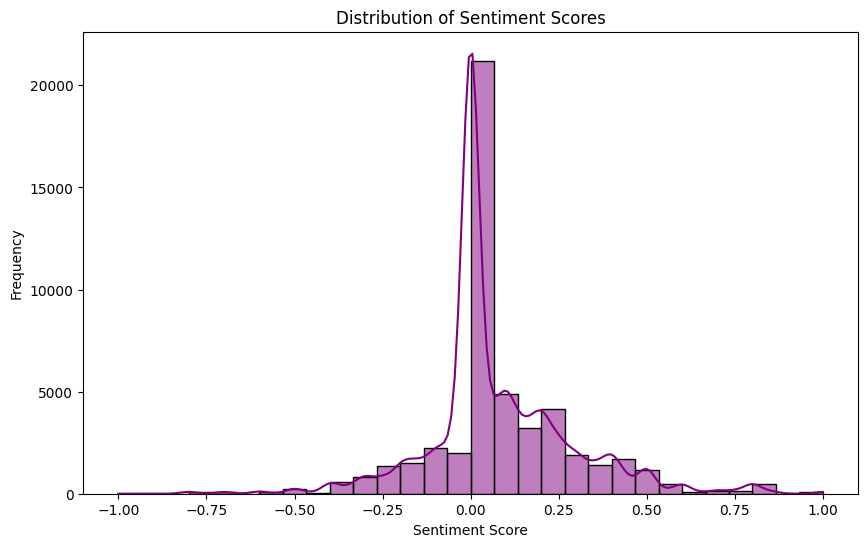

In [26]:
# Plot distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment_Score'], kde=True, color='purple', bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


**Correlation Heatmap:**

We’ll visualize the correlation between features such as age, loan amount, and sentiment score using a heatmap.

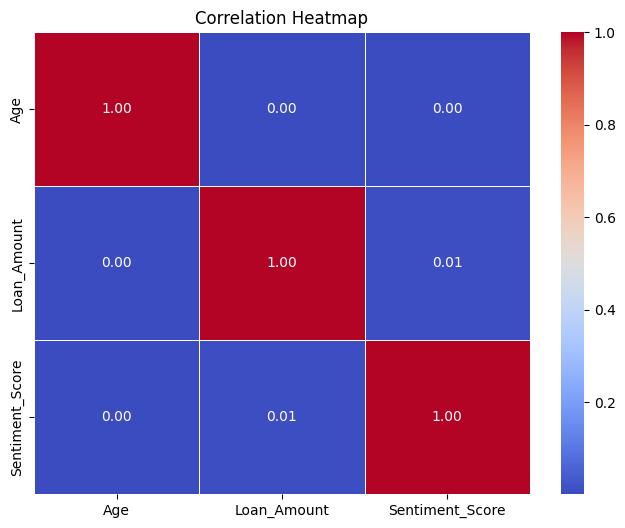

In [27]:
# Calculate correlation matrix
corr_matrix = data[['Age', 'Loan_Amount', 'Sentiment_Score']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Sentiment vs Default Rate:**

We’ll plot a count plot to compare sentiment labels with default rates.

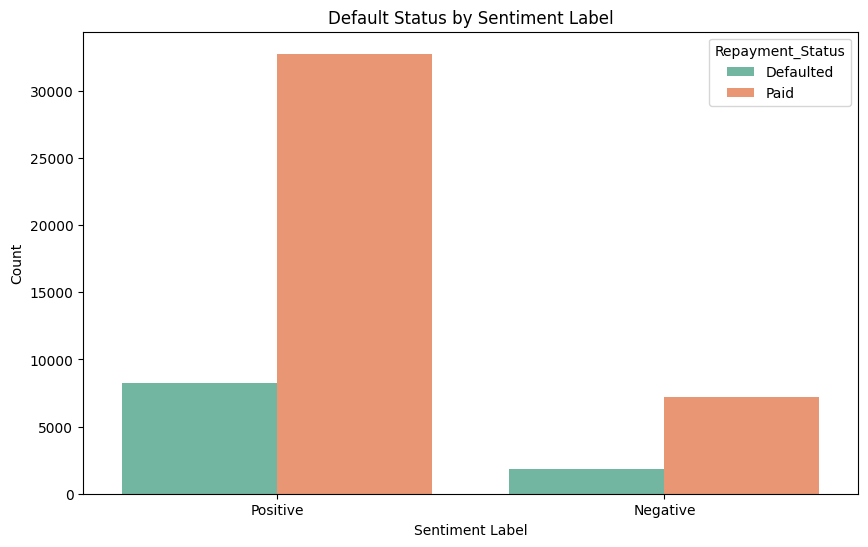

In [28]:
# Plot count of default status by sentiment label
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_Label', hue='Repayment_Status', data=data, palette='Set2')
plt.title('Default Status by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()
